## <center><b>Comprehensive Exploratory Data Analysis and Feature Engineering for Enhanced Data Insights</b>

In [1]:
# Importing Libraries
# Pandas library -> used for data manipulation and analysis.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading Data: Reads data from a CSV file.

df = pd.read_csv("data.csv")
df

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.22,18.0,F22,male
1,2,B,NaN,20.0,S22,female
2,3,C,3.62,NaN,F23,female
3,4,D,4.00,20.0,NaN,male
4,5,E,3.68,21.0,S23,male
5,6,F,3.89,NaN,NaN,female
6,7,Agent47,4.00,24.0,S01,male
7,7,Agent47,4.00,24.0,S01,male


#### <center><b>1. Data Cleaning and Preprocessing:</b>
✔ Handling missing values (imputation or removal).<br>
✔ Identifying and treating outliers.<br>
✔ Correcting data types and formatting.<br>
✔ Addressing duplicates and inconsistencies.<br>

In [3]:
# Understanding Data: Data types and shape

print(df.dtypes)
print('\nData Shape:', df.shape)

Student ID        int64
Student Name     object
CGPA            float64
Age             float64
Semester         object
Gender           object
dtype: object

Data Shape: (8, 6)


In [4]:
# if there any Null value it will show True

df.isnull().values.any()

True

In [5]:
# Identifying Missing Values: Detects missing values in the dataset.

df.isnull()

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,True,True,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False


In [6]:
# Identifying Missing Values: If there is no data inputed it will show False

# df.notnull()

In [7]:
# Data Cleaning: Removes rows with any missing values.

delete_row = df.dropna(inplace=False)
delete_row

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.22,18.0,F22,male
4,5,E,3.68,21.0,S23,male
6,7,Agent47,4.00,24.0,S01,male
7,7,Agent47,4.00,24.0,S01,male


In [8]:
# Identifying Duplicates: Detects duplicate rows in the dataset.

duplicates = df[df.duplicated()]
print(duplicates)

   Student ID Student Name  CGPA   Age Semester Gender
7           7      Agent47   4.0  24.0      S01   male


In [9]:
# Dropping Duplicates: Deletes duplicate rows from the dataset.

delete_duplicates = df.drop_duplicates()
delete_duplicates

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.22,18.0,F22,male
1,2,B,NaN,20.0,S22,female
2,3,C,3.62,NaN,F23,female
3,4,D,4.00,20.0,NaN,male
4,5,E,3.68,21.0,S23,male
5,6,F,3.89,NaN,NaN,female
6,7,Agent47,4.00,24.0,S01,male


In [10]:
# Handling Missing Values: Fills missing values with a specified value (0 in this case).
# Imputation: is the process of replacing missing data with substituted values.

impute_data = df.fillna(0)
impute_data

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.22,18.0,F22,male
1,2,B,0.00,20.0,S22,female
2,3,C,3.62,0.0,F23,female
3,4,D,4.00,20.0,0,male
4,5,E,3.68,21.0,S23,male
5,6,F,3.89,0.0,0,female
6,7,Agent47,4.00,24.0,S01,male
7,7,Agent47,4.00,24.0,S01,male


In [11]:
# Handling Missing Values: Fills missing values with:
# CGPA      -> mean CGPA
# Age       -> mean Age

# mean_cgpa = df['CGPA'].mean()
# mean_age = df['Age'].mean()

# fillna with mean CGPA and mean Age
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df


,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.220000,18.000000,F22,male
1,2,B,3.772857,20.000000,S22,female
2,3,C,3.620000,21.166667,F23,female
3,4,D,4.000000,20.000000,NaN,male
4,5,E,3.680000,21.000000,S23,male
5,6,F,3.890000,21.166667,NaN,female
6,7,Agent47,4.000000,24.000000,S01,male
7,7,Agent47,4.000000,24.000000,S01,male


#### <center><b>2. Data Transformation:</b>
✔ Normalization and scaling.<br>
✔ Encoding categorical variables.<br>
✔ Feature engineering and extractin.<br>

In [12]:
# Encoding Categorical Variables: Converts categorical data into numerical format using label encoding.
# Convert 'Gender' and 'Semester' labels in the DataFrame (df) to numeric labels (0 or 1),

le = LabelEncoder()

df['Semester'] = le.fit_transform(df['Semester'])
df['Gender'] = le.fit_transform(df['Gender'])
df

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.220000,18.000000,0,1
1,2,B,3.772857,20.000000,3,0
2,3,C,3.620000,21.166667,1,0
3,4,D,4.000000,20.000000,5,1
4,5,E,3.680000,21.000000,4,1
5,6,F,3.890000,21.166667,5,0
6,7,Agent47,4.000000,24.000000,2,1
7,7,Agent47,4.000000,24.000000,2,1


In [13]:
# One-Hot Encoding: Converts categorical data into binary columns using one-hot encoding.# resulting in a new DataFrame df1, and displays it.

df1 = pd.get_dummies(df, columns=['Semester', 'Gender'])
df1

,Student ID,Student Name,CGPA,Age,Semester_0,Semester_1,Semester_2,Semester_3,Semester_4,Semester_5,Gender_0,Gender_1
0,1,A,3.220000,18.000000,True,False,False,False,False,False,False,True
1,2,B,3.772857,20.000000,False,False,False,True,False,False,True,False
2,3,C,3.620000,21.166667,False,True,False,False,False,False,True,False
3,4,D,4.000000,20.000000,False,False,False,False,False,True,False,True
4,5,E,3.680000,21.000000,False,False,False,False,True,False,False,True
5,6,F,3.890000,21.166667,False,False,False,False,False,True,True,False
6,7,Agent47,4.000000,24.000000,False,False,True,False,False,False,False,True
7,7,Agent47,4.000000,24.000000,False,False,True,False,False,False,False,True


#### <center><b>3. Descriptive Statistics:</b>
✔ Measures of central tendency (mean, median, mode).<br>
✔ Measures of variability (count, mean, std, min, max and percentiles(25%, 50%, 75%)).<br>
✔ Distribution shapes (skewness, kurtosis).<br>

In [14]:
# Descriptive Statistics: Provides summary statistics of the impute_data DataFrame,
# provides -> count, mean, std, min, max and percentiles(25%, 50%, 75%)

df.describe()

,Student ID,CGPA,Age,Semester,Gender
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.375000,3.772857,21.166667,2.750000,0.625000
std,2.263846,0.268898,2.029544,1.832251,0.517549
min,1.000000,3.220000,18.000000,0.000000,0.000000
25%,2.750000,3.665000,20.000000,1.750000,0.000000
50%,4.500000,3.831429,21.083333,2.500000,1.000000
75%,6.250000,4.000000,21.875000,4.250000,1.000000
max,7.000000,4.000000,24.000000,5.000000,1.000000


In [15]:
# Descriptive Statistics: describle() only retures values for numerical values, not for descriptive values.
# Or we can make a numerical data frame manually

df_numeric = df[['Student ID', 'CGPA', 'Age', 'Semester', 'Gender']]
# since we used LevelEncoder() on 'Semester' and "Gender", these two collumns are numeric now.
df_numeric

,Student ID,CGPA,Age,Semester,Gender
0,1,3.220000,18.000000,0,1
1,2,3.772857,20.000000,3,0
2,3,3.620000,21.166667,1,0
3,4,4.000000,20.000000,5,1
4,5,3.680000,21.000000,4,1
5,6,3.890000,21.166667,5,0
6,7,4.000000,24.000000,2,1
7,7,4.000000,24.000000,2,1


#### <center><b>4. Identifying Patterns and Relationships:</b>
✔ Correlation analysis.<br>
✔ Identifying potential relationships and interactions between variables.<br>

In [16]:
# Correlation: Correlation is only possible for numeric values

corr = df_numeric.corr()
corr

,Student ID,CGPA,Age,Semester,Gender
Student ID,1.000000,0.778116,0.891320,0.370236,0.259097
CGPA,0.778116,1.000000,0.729896,0.610561,0.036661
Age,0.891320,0.729896,1.000000,0.051222,0.158671
Semester,0.370236,0.610561,0.051222,1.000000,-0.112987
Gender,0.259097,0.036661,0.158671,-0.112987,1.000000


In [17]:
# Correlation: Correlation for selective attributes is also possible

corr_CGPA_vs_Gender = df_numeric[['CGPA', 'Age', 'Gender']].corr()
corr_CGPA_vs_Gender

,CGPA,Age,Gender
CGPA,1.000000,0.729896,0.036661
Age,0.729896,1.000000,0.158671
Gender,0.036661,0.158671,1.000000


#### <center><b>5. Data Visualization:</b>
✔ Univariate analysis (histograms, box plots, density plots).<br>
✔ Bivariate analysis (scatter plots, correlation heatmaps).<br>
✔ Multivariate analysis (pair plots, 3D plots).<br>

In [18]:
# Grouping

group_cg = df_numeric.groupby('Age')['CGPA'].mean()
group_cg

Age
18.000000    3.220000
20.000000    3.886429
21.000000    3.680000
21.166667    3.755000
24.000000    4.000000
Name: CGPA, dtype: float64

In [19]:
# Sorting: by Age

sort_age = df_numeric.sort_values(by='Age')
sort_age

,Student ID,CGPA,Age,Semester,Gender
0,1,3.220000,18.000000,0,1
1,2,3.772857,20.000000,3,0
3,4,4.000000,20.000000,5,1
4,5,3.680000,21.000000,4,1
2,3,3.620000,21.166667,1,0
5,6,3.890000,21.166667,5,0
6,7,4.000000,24.000000,2,1
7,7,4.000000,24.000000,2,1


In [20]:
# Sorting: Descending

sort_age_decs = df_numeric.sort_values(by='Age', ascending=False)
sort_age_decs

,Student ID,CGPA,Age,Semester,Gender
6,7,4.000000,24.000000,2,1
7,7,4.000000,24.000000,2,1
2,3,3.620000,21.166667,1,0
5,6,3.890000,21.166667,5,0
4,5,3.680000,21.000000,4,1
1,2,3.772857,20.000000,3,0
3,4,4.000000,20.000000,5,1
0,1,3.220000,18.000000,0,1


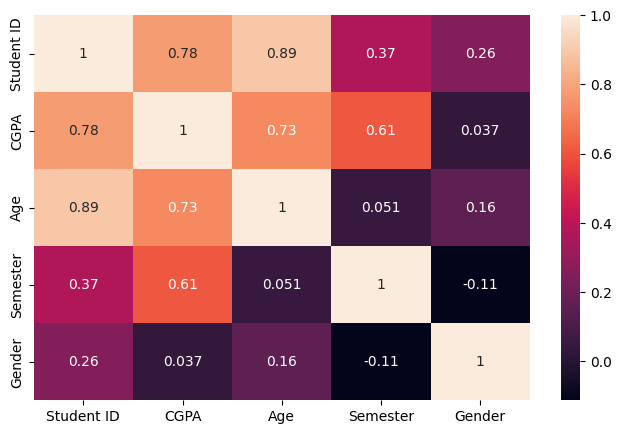

In [21]:
# Heatmap

plt.figure(figsize= (8,5))
sns.heatmap(corr, annot=True)
plt.show()

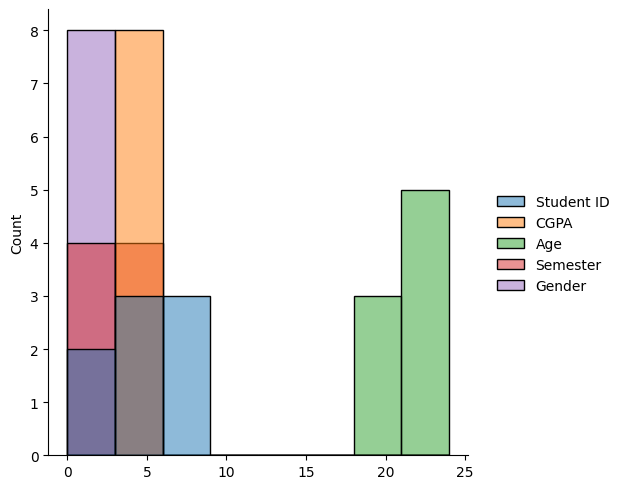

In [22]:
# Distributionplot

sns.displot(df_numeric)
plt.show()

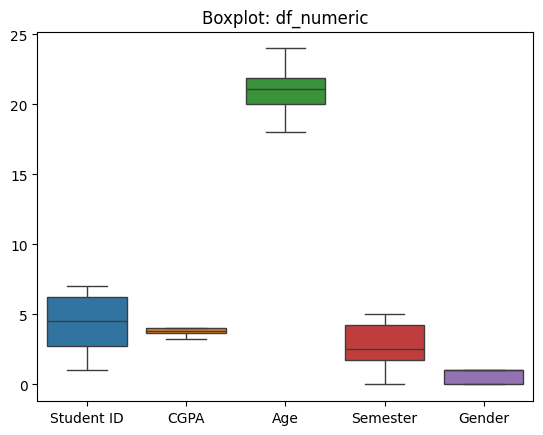

In [23]:
# Boxplot

sns.boxplot(df_numeric)
plt.title('Boxplot: df_numeric')
plt.show()

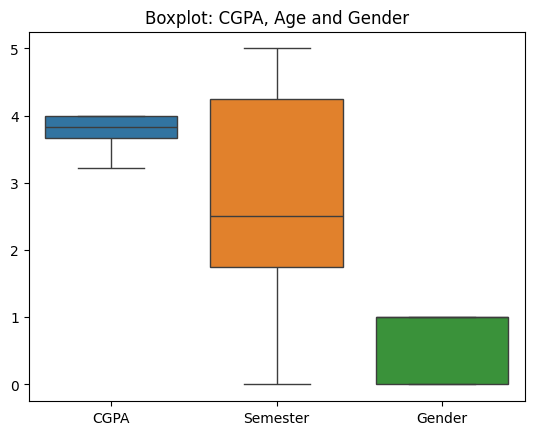

In [24]:
# Boxplot: particular collumns

sns.boxplot(df_numeric[['CGPA', 'Semester', 'Gender']])
plt.title('Boxplot: CGPA, Age and Gender')
plt.show()

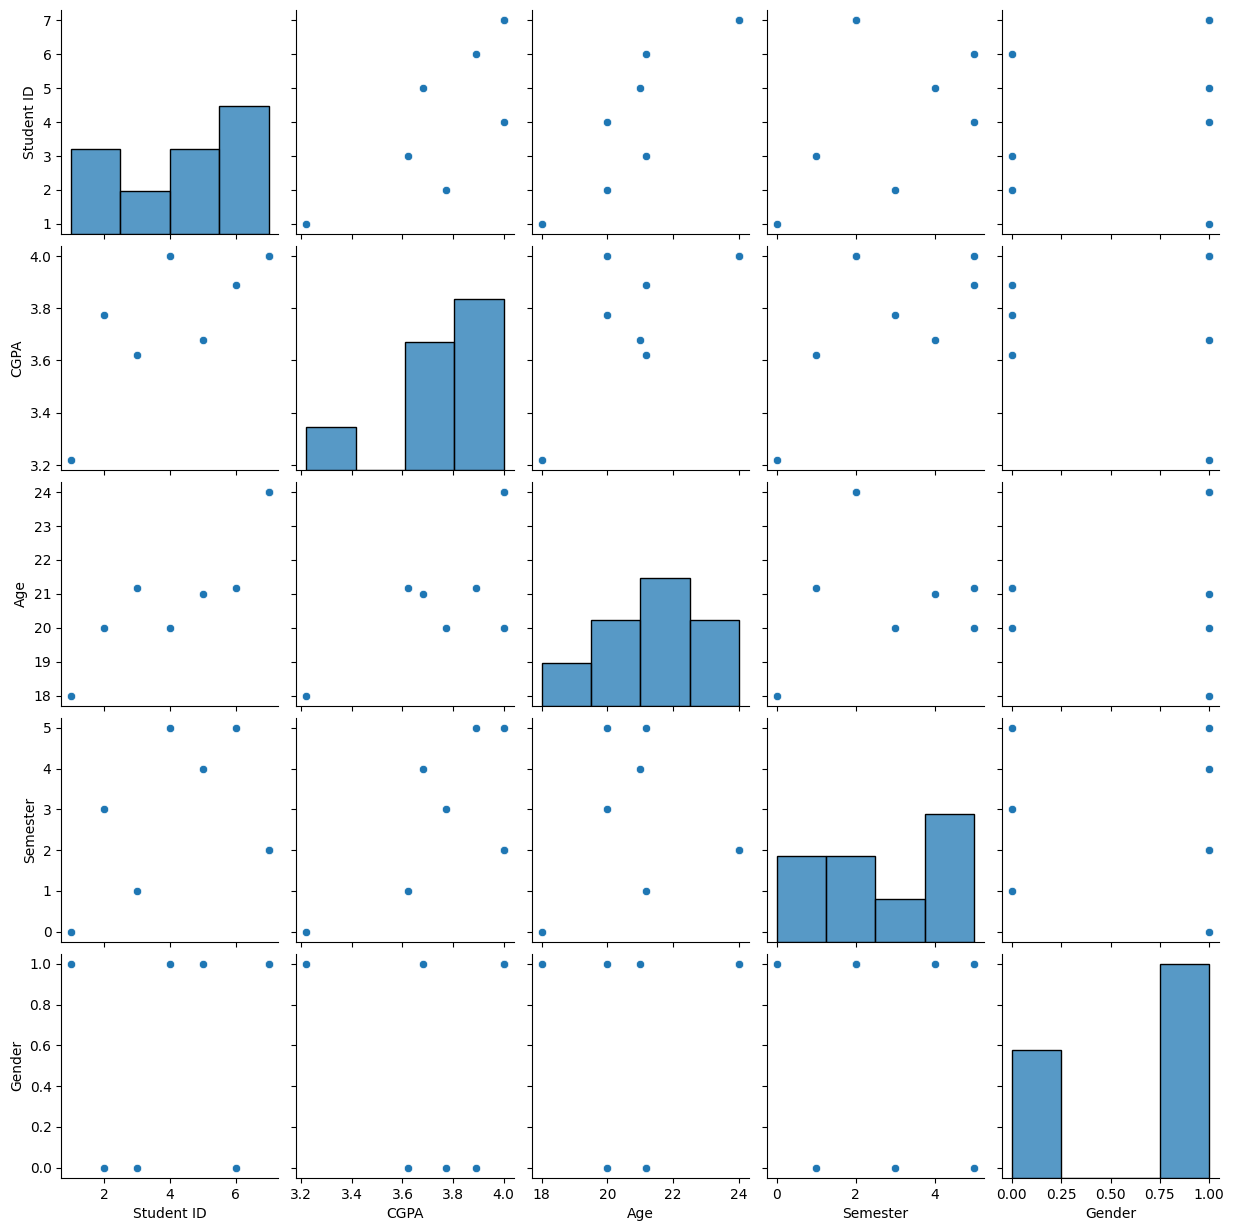

In [25]:
# Pairplot

sns.pairplot(df_numeric)
plt.show()

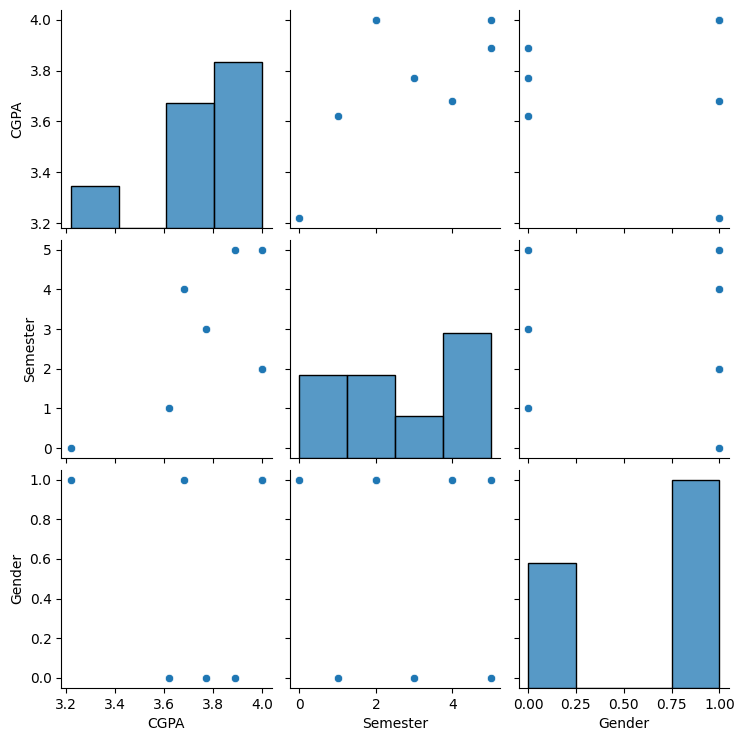

In [26]:
# Pairplot: particular collumns

sns.pairplot(df_numeric[['CGPA', 'Semester', 'Gender']])
plt.show()

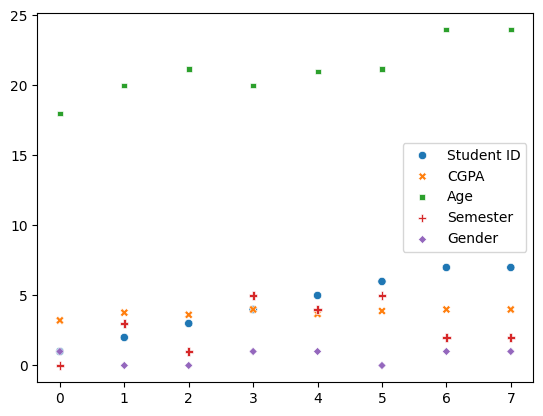

In [27]:
# Scatterplot

sns.scatterplot(df_numeric)
plt.show()

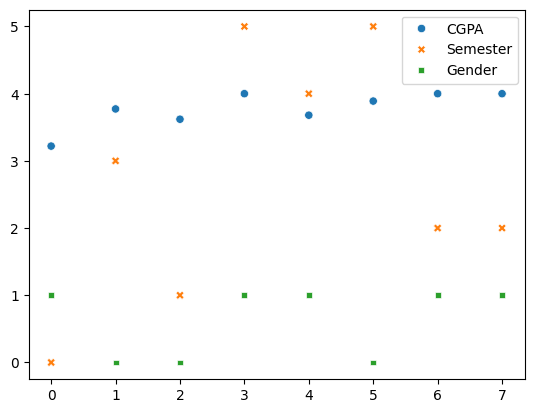

In [28]:
# Scatterplot: particular collumns

sns.scatterplot(df_numeric[['CGPA', 'Semester', 'Gender']])
plt.show()

array([[<Axes: title={'center': 'Student ID'}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Semester'}>],
       [<Axes: title={'center': 'Gender'}>, <Axes: >]], dtype=object)

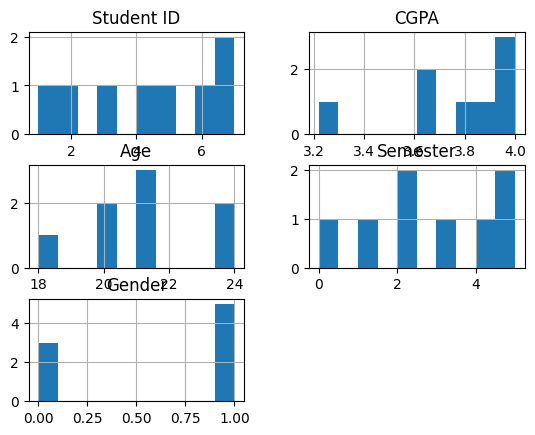

In [29]:
# Histogram

df_numeric.hist()

#### <center>Conclusion

In this notebook, we conducted a thorough Exploratory Data Analysis (EDA) and feature engineering on our dataset. 

Key Highlights:

1. **Data Cleaning**: Addressed missing values through imputation and removal, corrected data types, and removed duplicates.
2. **Descriptive Statistics**: Calculated central tendency and variability measures to understand data distribution.
3. **Data Visualization**: Used univariate, bivariate, and multivariate analyses to visualize distributions and relationships.
4. **Pattern Identification**: Conducted correlation analysis to uncover significant patterns and interactions between features.
5. **Feature Engineering**: Encoded categorical variables and created new features to enhance model performance.

These steps provided a solid foundation for further data analysis and modeling, ensuring data quality and uncovering valuable insights.